# Adam API usage example
https://docs.neanias.eu/projects/c2-dataexploration/en/latest/


In [14]:
import os
import pickle
import shutil
from tqdm import tqdm
import multiprocessing
from pathlib import Path
from functools import partial
import matplotlib.pyplot as plt
from datetime import date, datetime
from dateutil.relativedelta import relativedelta

import adamapi
from adamapi import Auth
from adamapi import Search
from adamapi import GetData
from adamapi import Datasets

In [15]:
! pip list |  grep adamapi

adamapi                      2.0.9              


In [16]:
os.environ["ADAM_API_KEY"]="qCKuUM8PMIx9llcCq8-yD-A1u01TZNN4CHT82Oo4o38"

In [17]:
a = Auth()
a.setKey(os.environ["ADAM_API_KEY"])
a.setAdamCore("https://explorer-space.adamplatform.eu")
a.authorize()

{'expires_at': '2022-05-20T14:31:16.538Z',
 'access_token': '7ba3103914e6416eaf8419bdc2b83262',
 'refresh_token': '305482c35b70411981460fa0a2c7add4',
 'expires_in': 3600}

In [18]:
datasets = Datasets(a)
items = datasets.getDatasets()
print( "Available datasets:")
for key in items: 
    print( key )

Available datasets:
type
properties
58592:MRO_CTX


In [19]:
datasetId = "58592:MRO_CTX"

In [20]:
metadata = datasets.getDatasets(datasetId)
metadata

{'datasetId': 'MRO_CTX',
 'creationDate': '2021-04-13T15:23:24Z',
 'dataType': 'Float32',
 'epsg': '4326',
 'keywords': [],
 'license': {'documentationUrl': '',
  'dataProviderName': 'Jacobs University',
  'dataProviderUrl': '',
  'licenseId': '',
  'dataPolicy': '',
  'doi': '',
  'credits': ''},
 'maxDate': '2020-08-31T18:19:37Z',
 'maxValue': [0.2],
 'minDate': '2006-03-24T04:41:07Z',
 'minValue': [-0.02],
 'noDataValue': -9999,
 'numberOfRecords': 7495,
 'profile': {'profileSchema': 'space_profile.json',
  'name': 'Space',
  'targetName': 'MARS',
  'observationMode': 'EDR',
  'instrument': 'CONTEXT CAMERA',
  'instrumentId': 'CTX',
  'mission': 'MARS RECONNAISSANCE ORBITER',
  'missionId': 'MRO',
  'processingLevel': '',
  'solarLongitudeMin': '',
  'solarLongitudeMax': '',
  'solarDistanceMin': '',
  'solarDistanceMax': '',
  'solarLongitudeStart': '',
  'solarLongitudeEnd': '',
  'EmissionAngleMax': 32.39,
  'EmissionAngleMin': 0.03,
  'IncidenceAngleMax': 86.83,
  'IncidenceAngl

In [21]:
print(f"Number of images: {metadata['numberOfRecords']}")

Number of images: 7495


## Count all products

In [22]:
min_start_date = date(2006, 3, 24)
max_end_date = date(2020, 8, 30)

In [23]:
def downloadMetadata(auth, start_date, end_date):
    search = Search(auth)
    maxRec = 200
    search_result = search.getProducts(
        datasetId,
        maxRecords=maxRec,
        startIndex=0,
        outputAttributes=['productId'],
        startDate=start_date,
        endDate=end_date
    )
    total_products = len(search_result['content'])
    print(f"Total products: {total_products}")
    if total_products > 0:
        return search_result["content"]
    else:
        return []

In [10]:
files_metadata = []

In [11]:
start_date = min_start_date #date(2015, 7, 1)
end_date = max_end_date #date(2016, 1, 1)
days = 15

In [12]:
while start_date < end_date:
    next_date = start_date + relativedelta(days=days)
    print(f"Download data from {start_date} - {next_date}")    
    files_metadata = files_metadata + downloadMetadata(a, start_date, next_date)
    start_date = next_date

Download data from 2006-03-24 - 2006-04-08
Total products: 0
Download data from 2006-04-08 - 2006-04-23
Total products: 0
Download data from 2006-04-23 - 2006-05-08
Total products: 0
Download data from 2006-05-08 - 2006-05-23
Total products: 0
Download data from 2006-05-23 - 2006-06-07
Total products: 0
Download data from 2006-06-07 - 2006-06-22
Total products: 0
Download data from 2006-06-22 - 2006-07-07
Total products: 0
Download data from 2006-07-07 - 2006-07-22
Total products: 0
Download data from 2006-07-22 - 2006-08-06
Total products: 0
Download data from 2006-08-06 - 2006-08-21
Total products: 0
Download data from 2006-08-21 - 2006-09-05
Total products: 0
Download data from 2006-09-05 - 2006-09-20
Total products: 0
Download data from 2006-09-20 - 2006-10-05
Total products: 0
Download data from 2006-10-05 - 2006-10-20
Total products: 0
Download data from 2006-10-20 - 2006-11-04
Total products: 0
Download data from 2006-11-04 - 2006-11-19
Total products: 9
Download data from 2006-

Total products: 3
Download data from 2011-10-09 - 2011-10-24
Total products: 3
Download data from 2011-10-24 - 2011-11-08
Total products: 3
Download data from 2011-11-08 - 2011-11-23
Total products: 1
Download data from 2011-11-23 - 2011-12-08
Total products: 3
Download data from 2011-12-08 - 2011-12-23
Total products: 4
Download data from 2011-12-23 - 2012-01-07
Total products: 5
Download data from 2012-01-07 - 2012-01-22
Total products: 2
Download data from 2012-01-22 - 2012-02-06
Total products: 3
Download data from 2012-02-06 - 2012-02-21
Total products: 3
Download data from 2012-02-21 - 2012-03-07
Total products: 5
Download data from 2012-03-07 - 2012-03-22
Total products: 4
Download data from 2012-03-22 - 2012-04-06
Total products: 1
Download data from 2012-04-06 - 2012-04-21
Total products: 0
Download data from 2012-04-21 - 2012-05-06
Total products: 2
Download data from 2012-05-06 - 2012-05-21
Total products: 2
Download data from 2012-05-21 - 2012-06-05
Total products: 3
Downlo

Total products: 1
Download data from 2017-04-25 - 2017-05-10
Total products: 3
Download data from 2017-05-10 - 2017-05-25
Total products: 1
Download data from 2017-05-25 - 2017-06-09
Total products: 0
Download data from 2017-06-09 - 2017-06-24
Total products: 0
Download data from 2017-06-24 - 2017-07-09
Total products: 0
Download data from 2017-07-09 - 2017-07-24
Total products: 0
Download data from 2017-07-24 - 2017-08-08
Total products: 0
Download data from 2017-08-08 - 2017-08-23
Total products: 0
Download data from 2017-08-23 - 2017-09-07
Total products: 0
Download data from 2017-09-07 - 2017-09-22
Total products: 1
Download data from 2017-09-22 - 2017-10-07
Total products: 0
Download data from 2017-10-07 - 2017-10-22
Total products: 0
Download data from 2017-10-22 - 2017-11-06
Total products: 0
Download data from 2017-11-06 - 2017-11-21
Total products: 0
Download data from 2017-11-21 - 2017-12-06
Total products: 0
Download data from 2017-12-06 - 2017-12-21
Total products: 0
Downlo

In [13]:
len(files_metadata)

905

In [17]:
pickle.dump(files_metadata, open("./files_metadata.pickle", 'wb'))

In [24]:
with open("./files_metadata.pickle", "rb") as metadata_file:
    products_metadata = pickle.load(metadata_file)    

In [25]:
products_metadata[0]

{'_id': {'$oid': '6277da7659de28212c0b872a'},
 'datasetId': 'MRO_CTX',
 'productDate': '2006-11-18T11:22:44Z',
 'productId': 'P01_001463_2077_XN_27N264W.tif',
 'version': 'npt05',
 'EmissionAngle': 0.08,
 'IncidenceAngle': 48.52,
 'MapScale': 5.66,
 'ObservationTime': '2006-11-18T11:22:55.215',
 'PhaseAngle': 48.51,
 'geometry': {'geometries': [{'type': 'Polygon',
    'coordinates': [[[95.0097617, 26.9026088],
      [95.6986405, 26.9026088],
      [95.7061593, 28.0811555],
      [95.0098667, 28.0811555],
      [95.0097617, 26.9026088]]]}],
  'type': 'GeometryCollection'},
 'insertDate': '2022-05-08T14:57:58Z',
 'instrument': 'CONTEXT CAMERA',
 'instrumentId': 'CTX',
 'mission': 'MARS RECONNAISSANCE ORBITER',
 'missionId': 'MRO',
 'observationMode': 'EDR',
 'status': '',
 'targetName': 'MARS'}

In [20]:
first_product = products_metadata[0]["productId"]
first_product

'P01_001463_2077_XN_27N264W.tif'

In [21]:
products_dates = [ datetime.fromisoformat(md["productDate"][:-1]+'+00:00') for md in products_metadata]

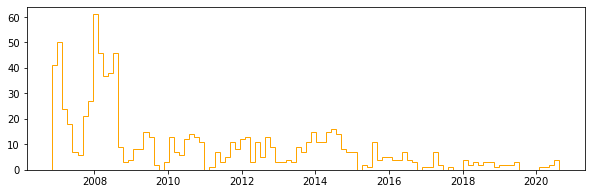

In [22]:
plt.figure(figsize=(10, 3))
_ = plt.hist(products_dates, bins=100, color="orange", histtype="step")

In [23]:
products_metadata[0]["productId"]

'P01_001463_2077_XN_27N264W.tif'

In [24]:
from adamapi import GetData
data=GetData(a)
data.getData(datasetId, productId = products_metadata[0]["productId"], outputFname=f"./{first_product}")

'./P01_001463_2077_XN_27N264W.tif'

## Download data

In [26]:
def extract_zip(output_dir, zip_file):

    unzipped_datafile = output_dir.joinpath(zip_file.stem)
    
    if not unzipped_datafile.exists():
        print(f"Unzipping {zip_file}..")
        shutil.unpack_archive(zip_file, output_dir)
    else:
        print(f"Unzipped file already exists: {unzipped_datafile}")

In [27]:
datapath_unzipped = Path("/shared_volume/tif")

In [28]:
with open("./files_metadata.pickle", "rb") as metadata_file:
    products_metadata = pickle.load(metadata_file)    

In [29]:
tmp_dir = Path("/shared_volume/tif_zip")
if tmp_dir.exists():
    shutil.rmtree(tmp_dir)
tmp_dir.mkdir(parents=True)

In [30]:
how_many = 50
adam_data_service = GetData(a)
not_found = []
found = []
for product_metadata in tqdm(products_metadata[:how_many]):
    
    output_filename = tmp_dir.joinpath(product_metadata["productId"]).with_suffix(".tif.zip")
    
    if not output_filename.exists():
        #print(f"Trying to download {output_filename.stem}...")        
        try:
            adam_data_service.getData(datasetId, productId = product_metadata["productId"], outputFname=output_filename)
        except Exception as e:
            print(f"Product ID {product_metadata['productId']} is not found")
            not_found.append(product_metadata['productId'])
            print(e)
            continue
        found.append(product_metadata['productId'])    
    else:
        print(f"File {output_filename} has already been downloaded...")

  0%|                                                    | 0/50 [00:00<?, ?it/s]

Trying to download P01_001463_2077_XN_27N264W.tif...


  2%|▉                                           | 1/50 [00:07<06:25,  7.86s/it]

Trying to download P01_001462_2017_XI_21N236W.tif...


  4%|█▊                                          | 2/50 [00:17<07:14,  9.05s/it]

Trying to download P01_001435_2280_XI_48N226W.tif...


  6%|██▋                                         | 3/50 [00:27<07:21,  9.40s/it]

Trying to download P01_001422_1747_XN_05S222W.tif...


  8%|███▌                                        | 4/50 [00:54<12:26, 16.22s/it]

Trying to download P01_001418_2494_XI_69N125W.tif...


 10%|████▍                                       | 5/50 [00:57<08:33, 11.40s/it]

Trying to download P01_001414_1780_XI_02S005W.tif...


 12%|█████▎                                      | 6/50 [01:02<06:46,  9.25s/it]

Trying to download P01_001356_2089_XN_28N225W.tif...


 14%|██████▏                                     | 7/50 [01:09<06:10,  8.62s/it]

Trying to download P01_001356_1747_XN_05S221W.tif...


 16%|███████                                     | 8/50 [01:31<09:01, 12.89s/it]

Trying to download P01_001332_1997_XI_19N289W.tif...


 18%|███████▉                                    | 9/50 [01:36<07:07, 10.42s/it]

Trying to download P01_001620_1749_XI_05S222W.tif...


 20%|████████▌                                  | 10/50 [02:02<10:04, 15.12s/it]

Trying to download P01_001612_1780_XI_02S005W.tif...


 22%|█████████▍                                 | 11/50 [02:08<08:10, 12.57s/it]

Trying to download P01_001554_1745_XI_05S221W.tif...


 24%|██████████▎                                | 12/50 [02:33<10:20, 16.34s/it]

Trying to download P01_001521_2026_XI_22N048W.tif...


 26%|███████████▏                               | 13/50 [02:40<08:11, 13.28s/it]

Trying to download P01_001513_1654_XI_14S184W.tif...


 28%|████████████                               | 14/50 [03:06<10:25, 17.37s/it]

Trying to download P01_001501_2281_XN_48N224W.tif...


 30%|████████████▉                              | 15/50 [03:13<08:10, 14.02s/it]

Trying to download P01_001488_1751_XI_04S222W.tif...


 32%|█████████████▊                             | 16/50 [03:25<07:41, 13.58s/it]

Trying to download P02_001833_2063_XN_26N278W.tif...


 34%|██████████████▌                            | 17/50 [03:44<08:17, 15.09s/it]

Trying to download P02_001832_2051_XN_25N251W.tif...


 36%|███████████████▍                           | 18/50 [03:54<07:19, 13.74s/it]

Trying to download P02_001820_1984_XI_18N282W.tif...


 38%|████████████████▎                          | 19/50 [04:00<05:44, 11.13s/it]

Trying to download P02_001805_1996_XN_19N233W.tif...


 40%|█████████████████▏                         | 20/50 [04:07<04:57,  9.93s/it]

Trying to download P02_001792_2016_XI_21N236W.tif...


 42%|██████████████████                         | 21/50 [04:18<04:57, 10.27s/it]

Trying to download P02_001777_1653_XI_14S184W.tif...


 44%|██████████████████▉                        | 22/50 [04:24<04:15,  9.13s/it]

Trying to download P02_001754_2021_XI_22N281W.tif...


 46%|███████████████████▊                       | 23/50 [04:29<03:35,  7.96s/it]

Trying to download P02_001752_1753_XI_04S222W.tif...


 48%|████████████████████▋                      | 24/50 [04:44<04:16,  9.85s/it]

Trying to download P02_001726_2014_XN_21N238W.tif...


 50%|█████████████████████▌                     | 25/50 [04:56<04:21, 10.46s/it]

Trying to download P02_001719_2024_XI_22N048W.tif...


 52%|██████████████████████▎                    | 26/50 [05:01<03:31,  8.80s/it]

Trying to download P03_002055_2280_XI_48N225W.tif...


 54%|███████████████████████▏                   | 27/50 [05:05<02:53,  7.52s/it]

Trying to download P03_002031_2052_XI_25N284W.tif...


 56%|████████████████████████                   | 28/50 [05:10<02:29,  6.78s/it]

Trying to download P03_002029_2077_XN_27N229W.tif...


 58%|████████████████████████▉                  | 29/50 [05:19<02:33,  7.29s/it]

Trying to download P03_002025_2484_XI_68N129W.tif...


 60%|█████████████████████████▊                 | 30/50 [05:21<01:57,  5.89s/it]

Trying to download P02_002012_2485_XI_68N128W.tif...


 62%|██████████████████████████▋                | 31/50 [05:23<01:31,  4.81s/it]

Trying to download P02_002003_2025_XN_22N239W.tif...


 64%|███████████████████████████▌               | 32/50 [05:42<02:40,  8.92s/it]

Trying to download P02_001976_2280_XI_48N225W.tif...


 66%|████████████████████████████▍              | 33/50 [05:47<02:12,  7.78s/it]

Trying to download P02_001972_2485_XI_68N128W.tif...


 68%|█████████████████████████████▏             | 34/50 [05:50<01:38,  6.17s/it]

Trying to download P02_001965_1988_XN_18N281W.tif...


 70%|██████████████████████████████             | 35/50 [06:01<01:56,  7.80s/it]

Trying to download P02_001963_2090_XN_29N228W.tif...


 72%|██████████████████████████████▉            | 36/50 [06:23<02:46, 11.88s/it]

Trying to download P02_001963_2021_XN_22N227W.tif...


 74%|███████████████████████████████▊           | 37/50 [06:31<02:19, 10.71s/it]

Trying to download P02_001959_2484_XI_68N127W.tif...


 76%|████████████████████████████████▋          | 38/50 [06:33<01:38,  8.24s/it]

Trying to download P02_001950_2089_XI_28N233W.tif...


 78%|█████████████████████████████████▌         | 39/50 [06:43<01:35,  8.72s/it]

Trying to download P02_001946_2484_XI_68N127W.tif...


 80%|██████████████████████████████████▍        | 40/50 [06:45<01:08,  6.82s/it]

Trying to download P02_001937_2008_XN_20N237W.tif...


 82%|███████████████████████████████████▎       | 41/50 [07:01<01:26,  9.62s/it]

Trying to download P02_001906_2484_XI_68N126W.tif...


 84%|████████████████████████████████████       | 42/50 [07:04<00:59,  7.47s/it]

Trying to download P02_001897_1747_XI_05S221W.tif...


 86%|████████████████████████████████████▉      | 43/50 [07:27<01:25, 12.19s/it]

Trying to download P02_001893_2485_XI_68N126W.tif...


 88%|█████████████████████████████████████▊     | 44/50 [07:30<00:56,  9.40s/it]

Trying to download P02_001890_1993_XI_19N033W.tif...


 90%|██████████████████████████████████████▋    | 45/50 [07:39<00:46,  9.37s/it]

Trying to download P02_001886_2049_XI_24N285W.tif...


 92%|███████████████████████████████████████▌   | 46/50 [07:49<00:37,  9.45s/it]

Trying to download P02_001880_2484_XI_68N128W.tif...


 94%|████████████████████████████████████████▍  | 47/50 [07:52<00:22,  7.42s/it]

Trying to download P03_002249_2483_XI_68N125W.tif...


 96%|█████████████████████████████████████████▎ | 48/50 [07:54<00:11,  5.96s/it]

Trying to download P03_002240_2089_XI_28N233W.tif...


 98%|██████████████████████████████████████████▏| 49/50 [08:05<00:07,  7.46s/it]

Trying to download P03_002236_2486_XI_68N128W.tif...


100%|███████████████████████████████████████████| 50/50 [08:08<00:00,  9.76s/it]


### Extracting data

In [31]:
zipped_data_files = [tmp_dir.joinpath(f) for f in os.listdir(tmp_dir) if tmp_dir.joinpath(f).exists() and ".tif.zip" in f]

In [32]:
len(zipped_data_files)

50

In [33]:
datapath_unzipped.mkdir(exist_ok=True, parents=True)

pool = multiprocessing.Pool(processes=5)

pool.map(partial(extract_zip, datapath_unzipped), zipped_data_files)

Unzipping /shared_volume/tif_zip/P03_002029_2077_XN_27N229W.tif.zip..Unzipping /shared_volume/tif_zip/P02_001820_1984_XI_18N282W.tif.zip..Unzipping /shared_volume/tif_zip/P02_001886_2049_XI_24N285W.tif.zip..Unzipping /shared_volume/tif_zip/P02_001832_2051_XN_25N251W.tif.zip..Unzipping /shared_volume/tif_zip/P02_001880_2484_XI_68N128W.tif.zip..




Unzipping /shared_volume/tif_zip/P03_002240_2089_XI_28N233W.tif.zip..
Unzipping /shared_volume/tif_zip/P02_001897_1747_XI_05S221W.tif.zip..
Unzipping /shared_volume/tif_zip/P01_001435_2280_XI_48N226W.tif.zip..
Unzipping /shared_volume/tif_zip/P01_001414_1780_XI_02S005W.tif.zip..
Unzipping /shared_volume/tif_zip/P03_002236_2486_XI_68N128W.tif.zip..
Unzipping /shared_volume/tif_zip/P02_001754_2021_XI_22N281W.tif.zip..
Unzipping /shared_volume/tif_zip/P01_001462_2017_XI_21N236W.tif.zip..
Unzipping /shared_volume/tif_zip/P01_001418_2494_XI_69N125W.tif.zip..
Unzipping /shared_volume/tif_zip/P01_001488_1751_XI_04S222W.tif.zip..
Unzipping /shared_vo

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]